<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Regression-Algorithms/blob/main/02_Multiple_Linear_Regression_(MLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression (MLR)

### Overview
  - It is an extension of Simple Linear Regression, where instead of predicting the dependent variable using a single independent variable, multiple independent variables are used.
  
  - MLR models the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data.


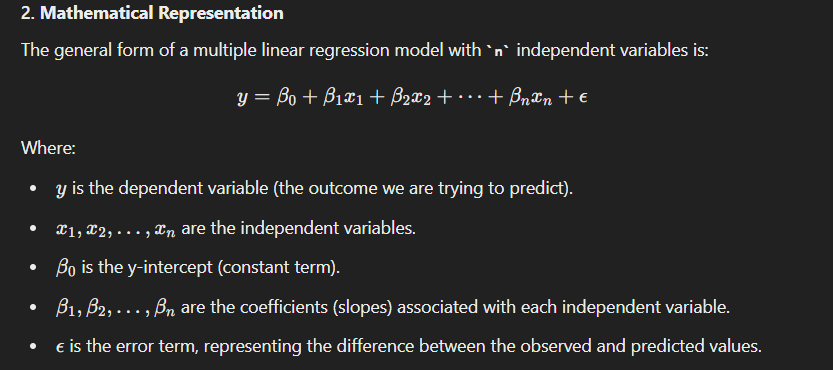


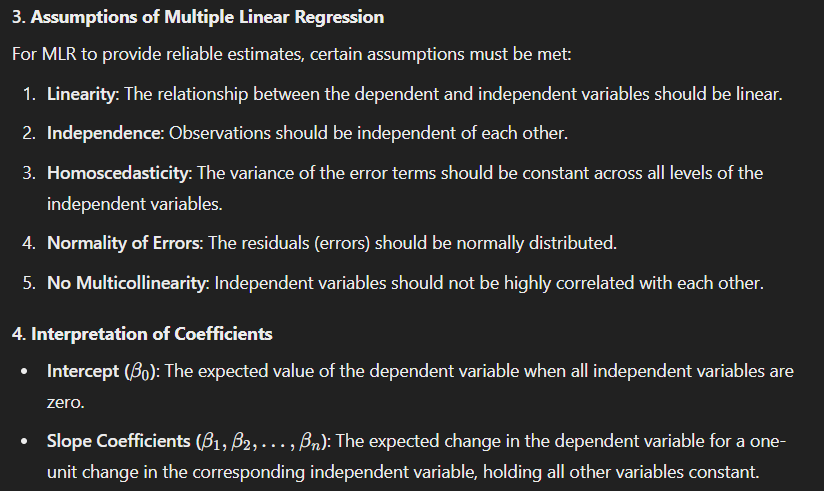


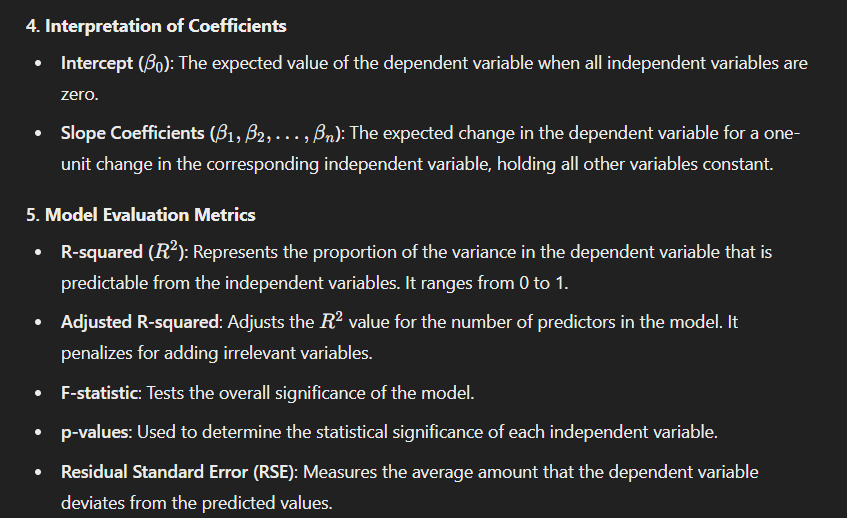



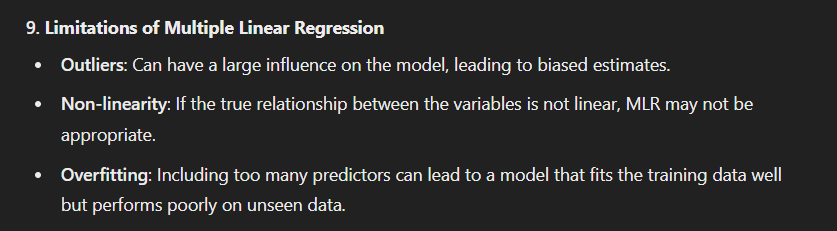

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Generate synthetic data
n_samples = 100
X1 = np.random.rand(n_samples) * 10  # Independent variable 1
X2 = np.random.rand(n_samples) * 20  # Independent variable 2
X3 = np.random.rand(n_samples) * 5   # Independent variable 3

# Creating a dependent variable with some noise
Y = 3 + 2*X1 + 0.5*X2 + 4*X3 + np.random.randn(n_samples) * 2

# Create a DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# Display the first few rows of the DataFrame
df.head()


,X1,X2,X3,Y
0,3.745401,0.628584,3.210158,23.736871
1,9.507143,12.728208,0.420700,28.757989
2,7.319939,6.287120,0.808144,28.303901
3,5.986585,10.171414,4.492771,39.297798
4,1.560186,18.151329,3.032145,23.274334


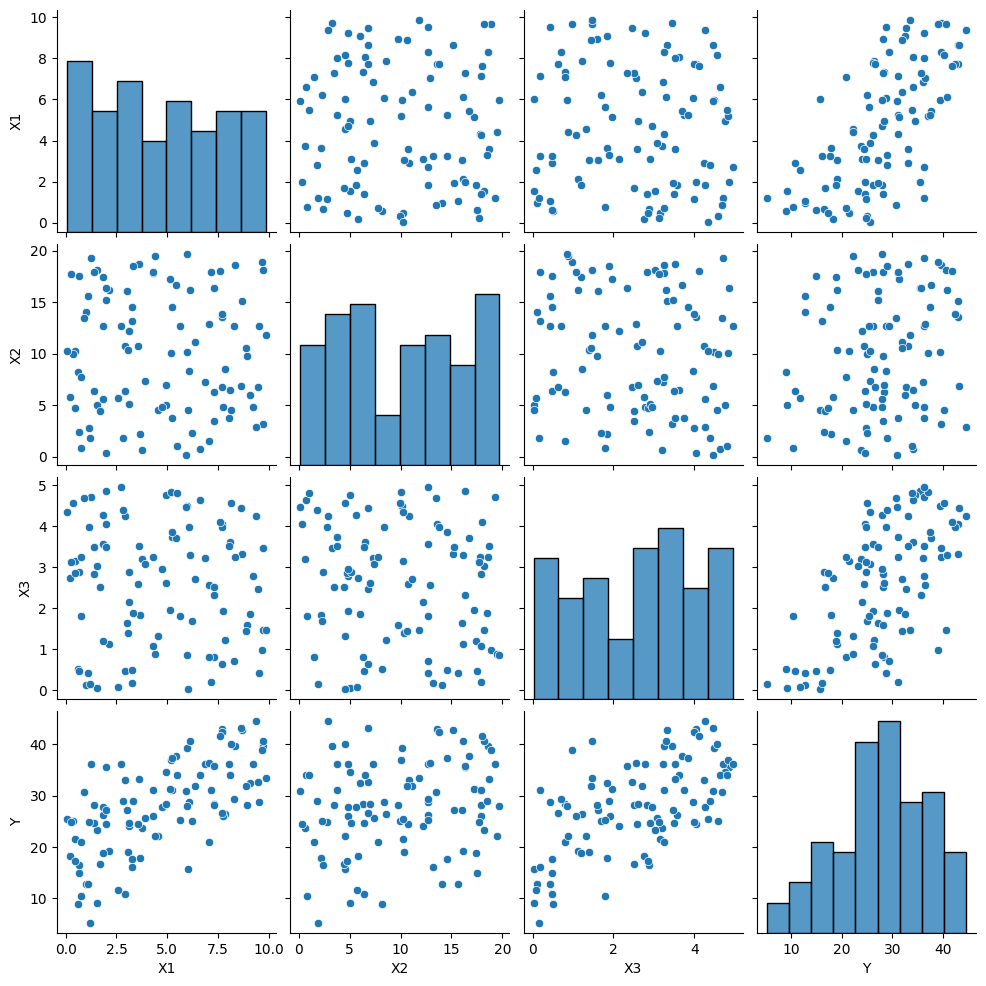

In [3]:
# Pairplot to visualize the relationships
sns.pairplot(df)
plt.show()


In [4]:
# Splitting data into training (80%) and testing (20%) sets
X = df[['X1', 'X2', 'X3']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Fitting the Multiple Linear Regression model

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 2.0288378650140935
Coefficients: [2.13280787 0.54207702 4.17008777]


In [6]:
# Making predictions and evaluating the model


# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 8.406318244785137
R-squared: 0.9341748406714306


In [7]:
# Detailed statistical summary using Statsmodels

# Adding a constant to the model (for the intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using Statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Display the model summary
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     570.6
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.26e-52
Time:                        10:07:22   Log-Likelihood:                -154.11
No. Observations:                  80   AIC:                             316.2
Df Residuals:                      76   BIC:                             325.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0288      0.693      2.929      0.0

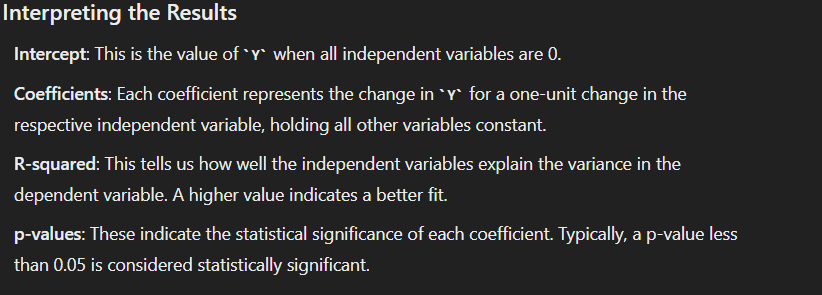

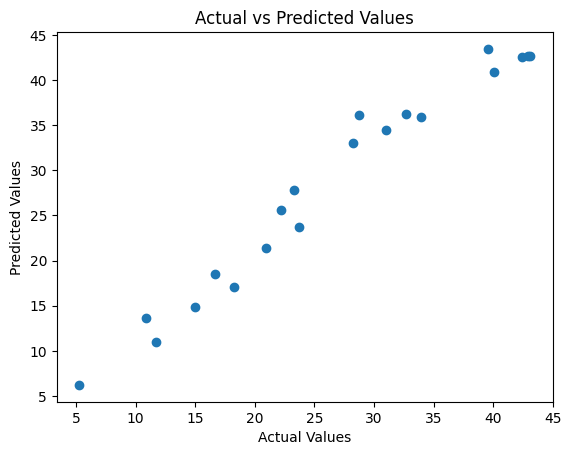

In [8]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Real world Applications

### 1. **Economics**
   - **GDP Forecasting**: Economists use MLR to predict Gross Domestic Product (GDP) based on factors like consumer spending, government expenditure, exports, and imports.
   - **Inflation Prediction**: MLR models can help in predicting inflation rates based on multiple economic indicators such as money supply, unemployment rates, and interest rates.

### 2. **Finance**
   - **Stock Market Prediction**: MLR is used to predict stock prices or returns based on factors like interest rates, earnings per share (EPS), market trends, and company performance metrics.
   - **Risk Management**: Financial analysts use MLR to model the risk (e.g., Value at Risk - VaR) associated with a portfolio by considering various factors like asset volatility, correlations, and market indices.

### 3. **Marketing**
   - **Sales Forecasting**: Businesses use MLR to predict sales based on advertising spend, pricing strategies, economic conditions, and seasonal factors.
   - **Customer Lifetime Value (CLV)**: MLR can estimate the lifetime value of a customer by analyzing variables such as purchase frequency, average order value, and customer engagement metrics.

### 4. **Healthcare**
   - **Predicting Disease Progression**: In healthcare, MLR is used to predict the progression of diseases based on patient demographics, lifestyle factors, and clinical test results.
   - **Hospital Resource Management**: MLR models help predict the demand for hospital resources (like ICU beds, ventilators) based on patient inflow, disease outbreaks, and seasonal trends.

### 5. **Real Estate**
   - **Property Valuation**: Real estate professionals use MLR to estimate property prices based on factors such as location, square footage, number of bedrooms, and proximity to amenities like schools and public transport.
   - **Market Analysis**: MLR is used to analyze market trends by considering factors such as interest rates, economic conditions, and local housing demand.

### 6. **Operations Research**
   - **Supply Chain Optimization**: Companies use MLR to optimize their supply chain operations by modeling the relationship between demand, inventory levels, transportation costs, and lead times.
   - **Quality Control**: MLR models are employed to identify factors that influence the quality of products in manufacturing, helping in the optimization of production processes.

### 7. **Environmental Science**
   - **Pollution Prediction**: Environmental scientists use MLR to predict pollution levels based on factors like industrial activity, traffic volume, and weather conditions.
   - **Climate Modeling**: MLR is used in climate studies to analyze the impact of various factors such as greenhouse gas emissions, deforestation, and ocean currents on global temperatures.

### 8. **Education**
   - **Student Performance Analysis**: Educational institutions use MLR to predict student performance based on factors like attendance, socioeconomic background, prior academic achievements, and teacher effectiveness.
   - **Resource Allocation**: MLR helps in optimizing resource allocation in schools by predicting the demand for facilities, teachers, and learning materials based on student enrollment trends.

### 9. **Energy**
   - **Electricity Demand Forecasting**: Energy companies use MLR to predict electricity demand based on factors like weather conditions, time of day, and economic activity.
   - **Renewable Energy Production**: MLR models are used to predict the output of renewable energy sources (like solar or wind power) based on factors such as weather patterns, solar irradiance, and wind speed.

### 10. **Transportation**
   - **Traffic Flow Prediction**: Urban planners use MLR to predict traffic flow based on variables like road capacity, vehicle counts, time of day, and road conditions.
   - **Public Transportation Optimization**: MLR helps in optimizing public transportation schedules and routes by analyzing factors such as passenger demand, travel times, and population density.

### 11. **Sports Analytics**
   - **Player Performance Prediction**: In sports, MLR is used to predict player performance by analyzing factors such as training intensity, physical fitness, previous match statistics, and opponent strengths.
   - **Team Success Factors**: Teams use MLR to determine the factors that contribute to winning matches, such as player synergy, defensive tactics, and coaching strategies.

### 12. **Human Resources**
   - **Employee Retention**: HR departments use MLR to predict employee turnover based on factors like job satisfaction, salary, career growth opportunities, and work-life balance.
   - **Recruitment and Hiring**: MLR models can help in predicting the success of new hires by analyzing variables such as educational background, previous work experience, and interview scores.

### 13. **Agriculture**
   - **Crop Yield Prediction**: Farmers and agricultural scientists use MLR to predict crop yields based on factors like soil quality, rainfall, temperature, and fertilizer usage.
   - **Pest and Disease Control**: MLR models help in predicting the likelihood of pest infestations or disease outbreaks in crops based on environmental conditions and past occurrences.

### 14. **Insurance**
   - **Premium Calculation**: Insurance companies use MLR to calculate insurance premiums by modeling the risk of claims based on factors like age, health, driving history, and location.
   - **Fraud Detection**: MLR is used to identify potential fraudulent claims by analyzing patterns and anomalies in claim data.

### 15. **Retail**
   - **Inventory Management**: Retailers use MLR to optimize inventory levels by predicting demand for products based on sales trends, seasonality, and promotions.
   - **Pricing Strategies**: MLR helps in setting optimal prices by analyzing the impact of different pricing strategies on sales volume and profit margins.

#  Application 1: Stock Market Prediction

Multiple Linear Regression to predict the closing price of a stock based on various independent variables such as:

  - Opening Price: The price of the stock at the start of the trading day.
  - Highest Price: The highest price of the stock during the trading day.
  - Lowest Price: The lowest price of the stock during the trading day.
  - Volume: The number of shares traded during the day.

Scenario

Suppose you are a data scientist working for a financial institution. Your task is to predict the closing price of a stock based on historical data. You have a dataset that includes the opening price, highest price, lowest price, and trading volume for each day.

In [9]:
#  Importing Libraries and Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Set a random seed for reproducibility
np.random.seed(42)

# Creating a synthetic dataset
n_samples = 200
open_price = np.random.uniform(100, 200, n_samples)
high_price = open_price + np.random.uniform(0, 20, n_samples)
low_price = open_price - np.random.uniform(0, 20, n_samples)
volume = np.random.uniform(10000, 50000, n_samples)

# The closing price is typically close to the open, high, or low, with some random noise
close_price = open_price + 0.5 * (high_price - low_price) + np.random.normal(0, 2, n_samples)

# Creating a DataFrame
df = pd.DataFrame({
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Volume': volume,
    'Close': close_price
})

# Displaying the first few rows of the dataset
print(df.head())



         Open        High         Low        Volume       Close
0  137.454012  150.294645  135.391535  16757.402523  143.324618
1  195.071431  196.754230  177.020373  21143.613561  205.881296
2  173.199394  176.431968  163.094347  17080.419371  183.632254
3  159.865848  177.836932  143.336699  13548.101350  179.806805
4  115.601864  127.730445  109.200872  14825.434844  128.053024


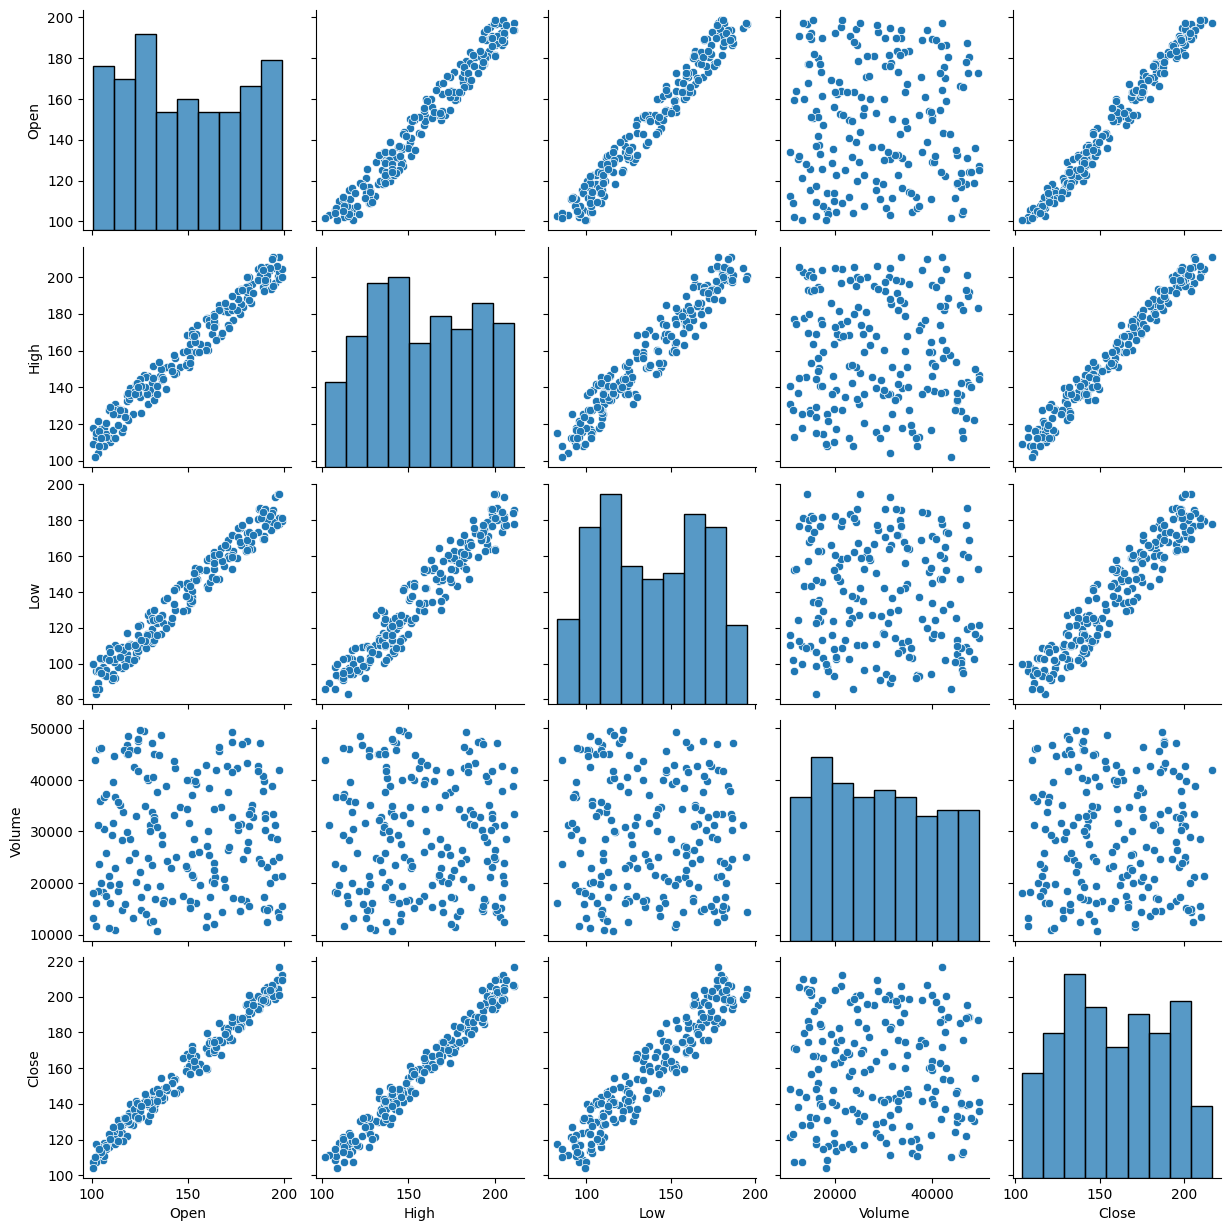

In [10]:
# Visualizing the Dataset

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()


In [11]:
#  Splitting the Data into Training and Testing Sets

# Defining independent variables (features) and dependent variable (target)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Splitting the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 4) (40, 4) (160,) (40,)


In [12]:
# Building and Fitting the Multiple Linear Regression Model

# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Extracting the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 0.09485787795040324
Coefficients: [ 1.05061182e+00  4.52152133e-01 -4.97834195e-01 -1.44596369e-05]


In [13]:
# Making Predictions and Evaluating the Model

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 3.2897203904261927
R-squared: 0.9963980620030417


In [14]:
# Detailed Statistical Summary Using Statsmodels

# Adding a constant to the model (for the intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using Statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Displaying the model summary
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     8622.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          6.68e-181
Time:                        10:34:26   Log-Likelihood:                -336.09
No. Observations:                 160   AIC:                             682.2
Df Residuals:                     155   BIC:                             697.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0949      1.029      0.092      0.9

# Interpreting the Results
  - Intercept: This is the expected closing price when all independent variables are zero.
  - Coefficients: Each coefficient tells us how much the closing price is expected to change with a one-unit change in the corresponding independent variable, holding all other variables constant.
  - R-squared: This value shows how well the independent variables explain the variability in the closing price. A value closer to 1 indicates a better fit.

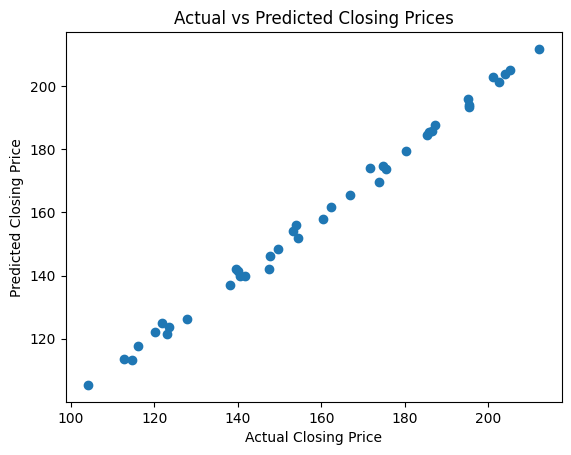

In [15]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs Predicted Closing Prices")
plt.show()


In [16]:
# Example

# Display the first five rows of the test set as example inputs
example_inputs = X_test.head()
print("Example Input Data (First 5 Rows of Test Set):")
print(example_inputs)

# Making predictions on these example inputs
predicted_values = model.predict(example_inputs)
print("\nPredicted Closing Prices for the Example Inputs:")
print(predicted_values)

# Corresponding actual closing prices for comparison
actual_values = y_test.head()
print("\nActual Closing Prices for the Example Inputs:")
print(actual_values.values)


Example Input Data (First 5 Rows of Test Set):
           Open        High         Low        Volume
95   149.379560  159.824425  142.312515  34424.801698
15   118.340451  123.085433  109.371541  46834.896021
30   160.754485  176.650711  157.894652  38533.983435
158  123.763754  142.568359  108.661009  45755.703322
128  100.695213  109.087214   99.567703  18065.092802

Predicted Closing Prices for the Example Inputs:
[157.95393674 124.95196679 169.69587161 139.82833171 105.38103338]

Actual Closing Prices for the Example Inputs:
[160.34211828 121.88768374 173.83042724 140.56856251 104.23193304]


<ipython-input-17-2140e33605b0>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Line for perfect prediction


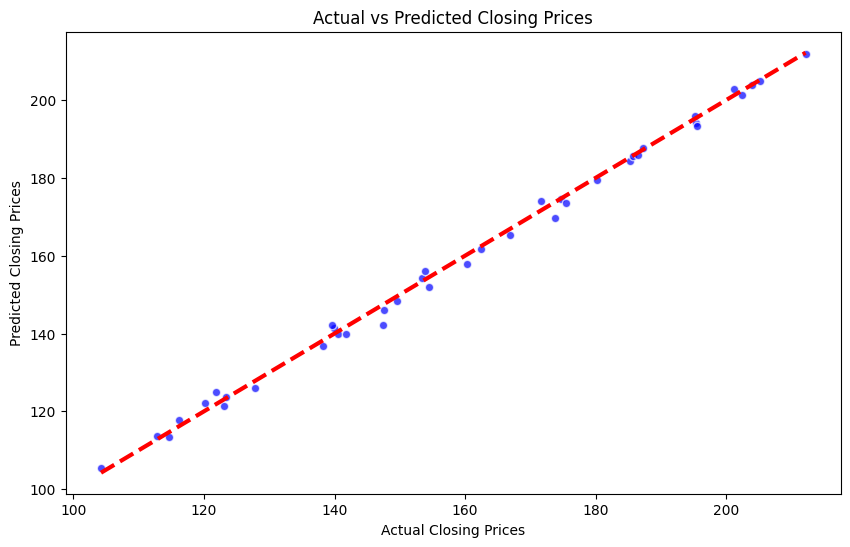

In [17]:
# Making predictions on the entire test set
y_pred_full = model.predict(X_test)

# Plotting the actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_full, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Line for perfect prediction
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.title("Actual vs Predicted Closing Prices")
plt.show()


# Multiple Linear Regression for Inventory Management

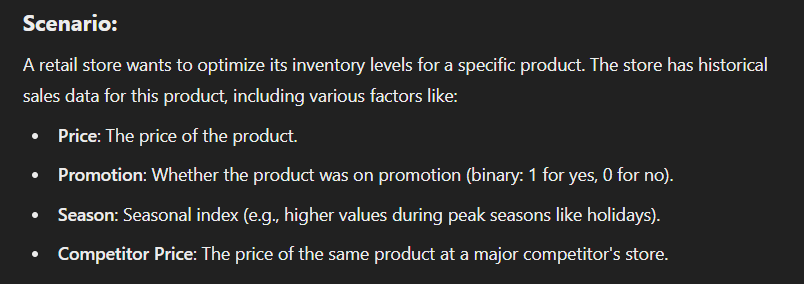

In [18]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
# Create a Synthetic Dataset

# Setting a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Creating synthetic data
price = np.random.uniform(10, 30, n_samples)           # Random prices between $10 and $30
promotion = np.random.randint(0, 2, n_samples)         # Binary promotion indicator (0 or 1)
season = np.random.uniform(0.5, 1.5, n_samples)        # Seasonal index (higher in peak seasons)
competitor_price = np.random.uniform(10, 30, n_samples)# Competitor prices between $10 and $30

# Generating sales with some random noise
sales = (50 + (-2.5 * price) + (15 * promotion) + (30 * season) +
         (-1.2 * competitor_price) + np.random.randn(n_samples) * 5)

# Creating a DataFrame
df = pd.DataFrame({
    'Price': price,
    'Promotion': promotion,
    'Season': season,
    'Competitor_Price': competitor_price,
    'Sales': sales
})

# Display the first few rows of the dataset
df.head()


,Price,Promotion,Season,Competitor_Price,Sales
0,17.490802,0,1.408266,15.888978,35.270016
1,29.014286,1,0.739562,17.701955,-6.540039
2,24.639879,0,0.644895,27.022733,-29.587674
3,21.973170,0,0.989453,16.338440,7.455048
4,13.120373,1,1.485650,13.389855,61.696054


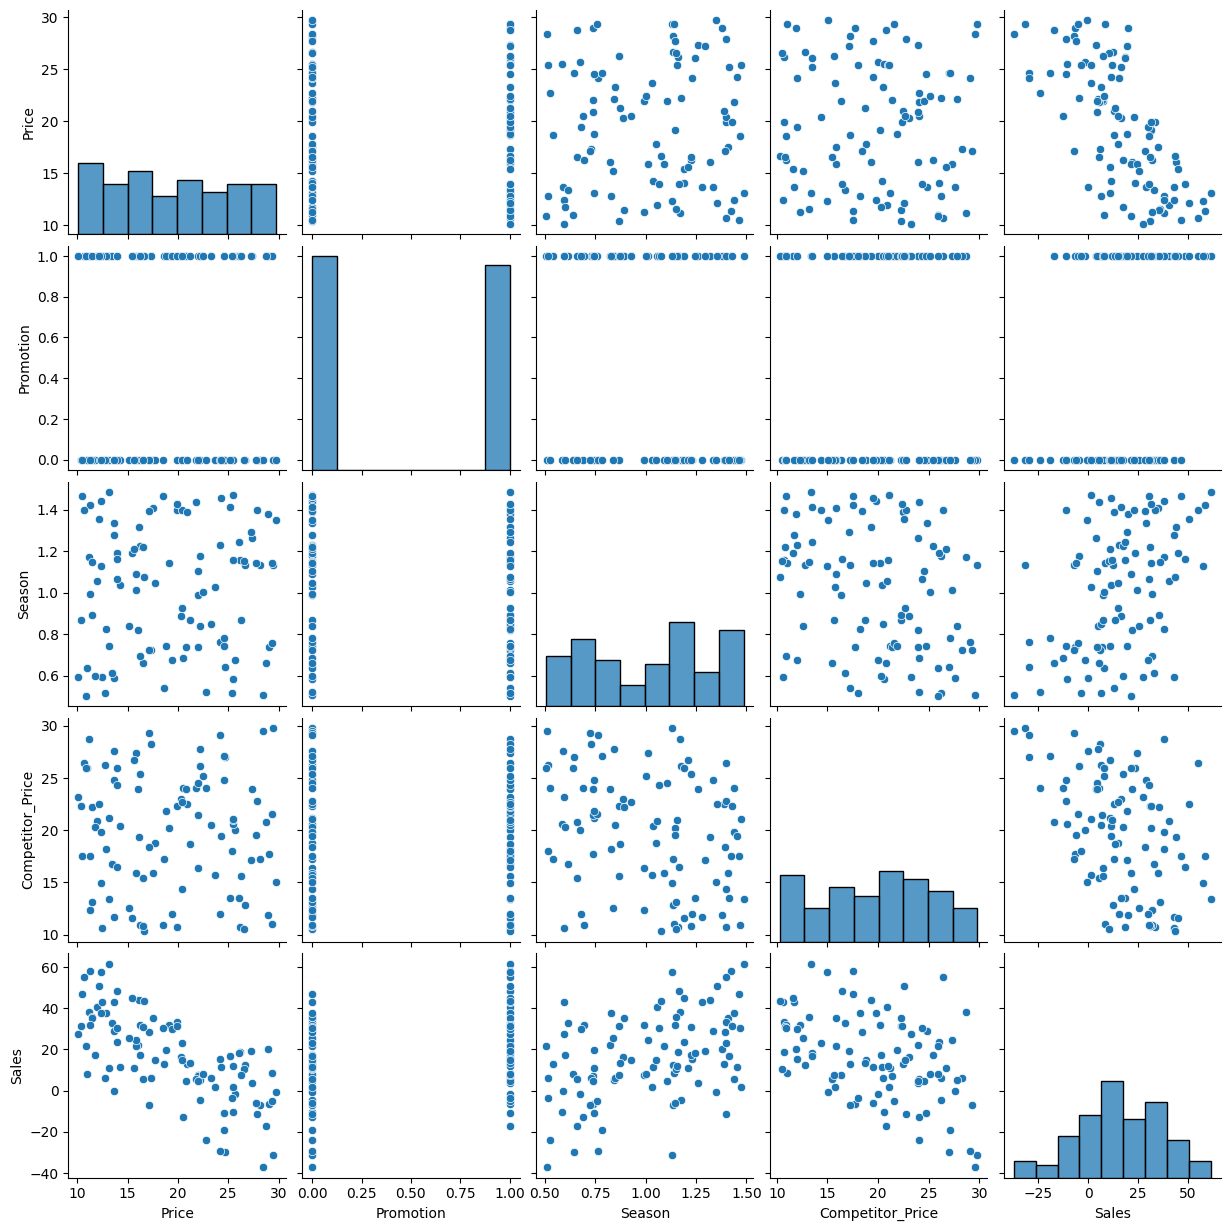

In [20]:
# Visualize the Data

import seaborn as sns
sns.pairplot(df)
plt.show()


In [21]:
# Split the Data into Training and Testing Sets
# Define the independent variables (features) and the dependent variable (target)
X = df[['Price', 'Promotion', 'Season', 'Competitor_Price']]
y = df['Sales']

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Matching coefficients to features
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df


Intercept: 52.390622604954686
Coefficients: [-2.5379043  15.40224424 30.2089704  -1.29634943]


,Coefficient
Price,-2.537904
Promotion,15.402244
Season,30.208970
Competitor_Price,-1.296349


In [23]:
# Predicting the sales on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 18.111722237982097
R-squared: 0.9276993754464705


In [24]:
# Use the Model for Inventory Management Decisions
# Example: Predicting sales for the next month
# Scenario: The price is $25, the product is on promotion, it's a peak season, and competitor's price is $27
new_data = np.array([[25, 1, 1.3, 27]])

# Predicting sales
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f} units")


Predicted Sales: 8.62 units


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


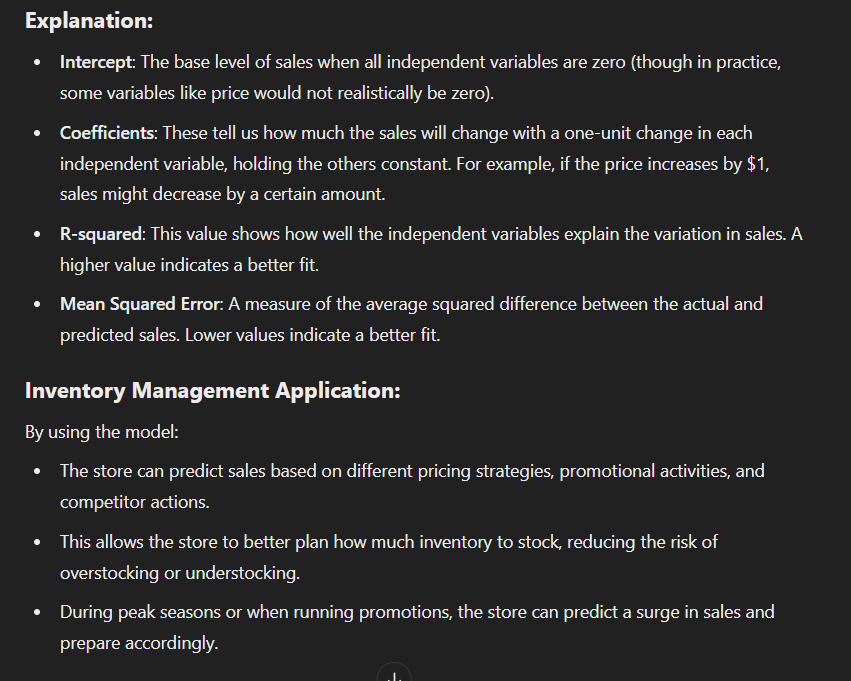